# Tiny illustration of Laplace approximations

This script is a super tiny illustration of a Laplace approximation - one where curvature approximation is tractable and can be easy visualised

2025-06-17 11:52:24.785 | DEBUG    | laplax.api:laplace:765 - Creating curvature MV - factor = 1/1 = 1.0
2025-06-17 11:52:24.786 | DEBUG    | laplax.api:_maybe_wrap_loader_or_batch:186 - Using *single batch* curvature evaluation.
2025-06-17 11:52:25.470 | DEBUG    | laplax.api:laplace:789 - Curvature estimated: full
2025-06-17 11:52:25.471 | DEBUG    | laplax.api:laplace:798 - Posterior callable constructed.
/home/t/Projects/laplax/examples/plotting.py:511: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 325x200.861 with 1 Axes>,
 <Axes: xlabel='$\\theta_1$', ylabel='$\\theta_2$'>)

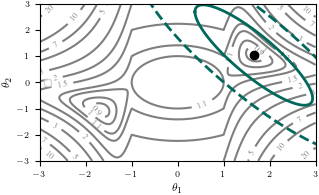

In [1]:
import jax.numpy as jnp
from jax.nn import relu
from plotting import plot_figure_1

from laplax import laplace

# You need optimized parameters,
best_params = {
    "theta1": jnp.array(1.6546547), "theta2": jnp.array(1.0420421)
}
model_fn = (  # a model function,
    lambda input, params:
        relu(params["theta1"] * input - 1) * params["theta2"]
)
data = {  # and training data.
    "input": jnp.array([1., -1.]).reshape(2, 1),
    "target": jnp.array([1., -1.]).reshape(2, 1)
}

# Then apply laplax
posterior_fn, _ = laplace(
    model_fn, best_params, data,
    loss_fn="mse", curv_type="full",
)
curv = posterior_fn({"prior_prec": 0.2}).state['scale']

# to get figure 1.
plot_figure_1(model_fn, best_params, curv)